In [123]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import ruptures as rpt


In [124]:
def convertDF(path): 
    '''converting a dataframe to a new datafrom with float, 5 decimal places and '''

    # reading in file, and skipping top row
    df = pd.read_csv(path, skiprows=1)

    # defining the titles of the rows
    body_loc = df.columns.tolist()

    # creating new empty dataframe
    df_new = pd.DataFrame()


    for part in body_loc:
        if part == 'bodyparts' or '.2' in part:
            continue
        else:
            df_new[part] = pd.to_numeric(df[part].iloc[1:], errors='coerce').dropna().round(5).astype(float)


    return df_new

In [125]:
convertDF(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv')

,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


In [126]:
# defining my path to pt one
IO_03_09_2023_RSTN = Path(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder')

# list of all the videos for this specific patient (c1s is missing for this patient)
dbs_loc = ['b1f', 'b1s', 'b2f', 'b2s', 'b3f', 'b3s', 'c1f', 'c1s', 'c2s', 'c3f', 'c3s', 't1f', 't1s', 't2f', 't2s', 't3f', 't3s']

# place to store all the df
dataframes = {}

files = list(IO_03_09_2023_RSTN.iterdir())

# iterating over each file for pt 1 and converting the df to floats and cleaning up the data
for file, label in zip(IO_03_09_2023_RSTN.iterdir(), dbs_loc):
    dataframes[label] = convertDF(file)
    print(f"{label} loaded from {file.name}")


b1f loaded from 20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b1s loaded from 20230309_b1_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2f loaded from 20230309_b2_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2s loaded from 20230309_b2_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3f loaded from 20230309_b3_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3s loaded from 20230309_b3_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1f loaded from 20230309_c1_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1s loaded from 20230309_c2_d2p0_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c2s loaded from 20230309_c2_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c3f lo

In [128]:
b1f = dataframes['b1f']


## Trying to do reduction analysis to see which camera and either x or y works better,a nd see if there is a correlation

In [129]:
import numpy as np

# Extract X and Y components for MCP1
mcp1_x = b1f['MCP1']
mcp1_y = b1f['MCP1.1']

# Optionally, combine them into a NumPy array for PCA (shape: [n_frames, 2])
mcp1_xy = b1f[['MCP1', 'MCP1.1']].values



In [130]:

from sklearn.preprocessing import StandardScaler

# Center (but do not scale) the data
scaler = StandardScaler(with_std=False)
mcp1_centered = scaler.fit_transform(mcp1_xy)





In [131]:
from sklearn.decomposition import PCA

# Create and fit PCA model
pca = PCA(n_components=2)  # We keep both components since it's 2D
principal_components = pca.fit_transform(mcp1_centered)


In [132]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal axes (components):\n", pca.components_)


Explained variance ratio: [0.9278434 0.0721566]
Principal axes (components):
 [[ 0.24788796  0.96878871]
 [ 0.96878871 -0.24788796]]


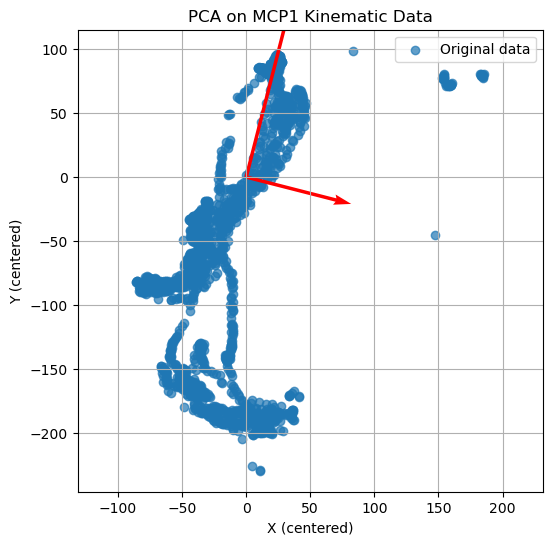

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(mcp1_centered[:, 0], mcp1_centered[:, 1], alpha=0.7, label='Original data')
origin = [0], [0]  # origin point

# Plot principal axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # scale for visibility
    plt.quiver(*origin, v[0], v[1], color='r', scale=1, scale_units='xy', angles='xy')

plt.xlabel("X (centered)")
plt.ylabel("Y (centered)")
plt.title("PCA on MCP1 Kinematic Data")
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()


## Plotting all components of one run to see which is easiest to analyze

b1f MCP1 (X) — Change points: [1730, 4258]
b1f MCP1.1 (Y) — Change points: [1745, 2515, 3210, 4010, 4258]
b1s MCP1 (X) — Change points: [550, 565, 675, 690, 945, 960, 1825, 1875, 2765, 3550, 4365, 4380, 4556]
b1s MCP1.1 (Y) — Change points: [725, 765, 1210, 1265, 2800, 3510, 4556]


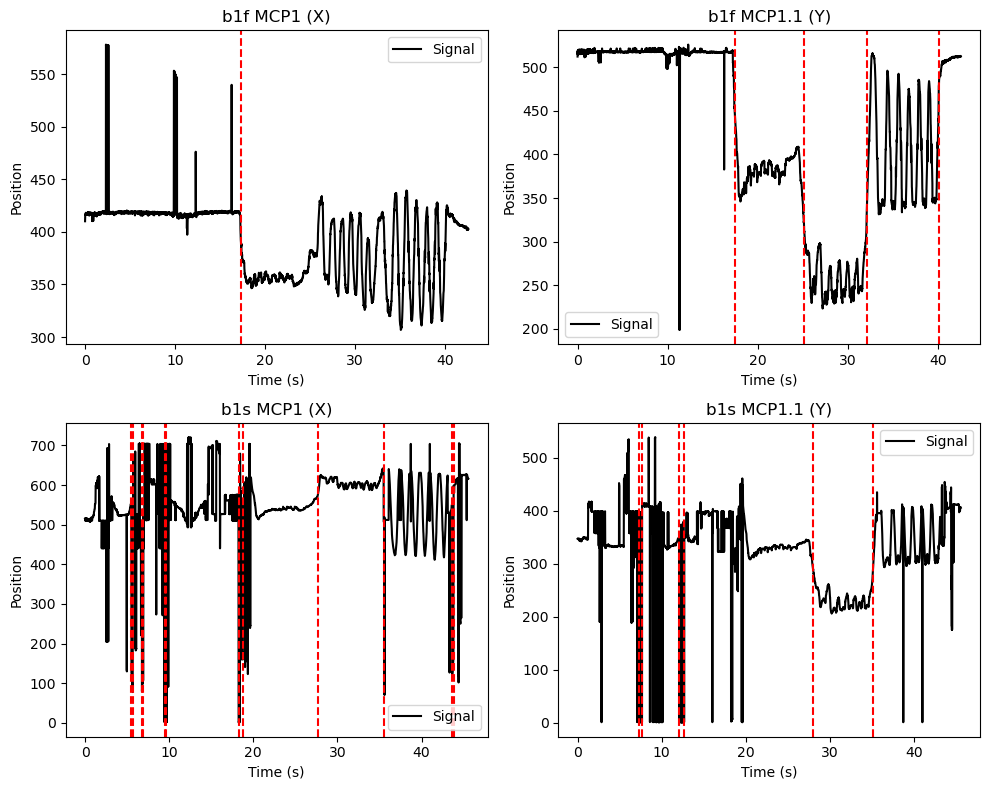

In [111]:
# Pulling data from the dataframe
b1f = dataframes['b1f']
b1s = dataframes['b1s']
xf = b1f['MCP1']
yf = b1f['MCP1.1']
xs = b1s['MCP1']
ys = b1s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['b1f MCP1 (X)', 'b1f MCP1.1 (Y)', 'b1s MCP1 (X)', 'b1s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()


b2f MCP1 (X) — Change points: [410, 1275, 3271]
b2f MCP1.1 (Y) — Change points: [400, 1345, 2170, 2255, 2960, 3271]
b2s MCP1 (X) — Change points: [1270, 2185, 3223]
b2s MCP1.1 (Y) — Change points: [400, 1345, 2160, 2920, 3223]


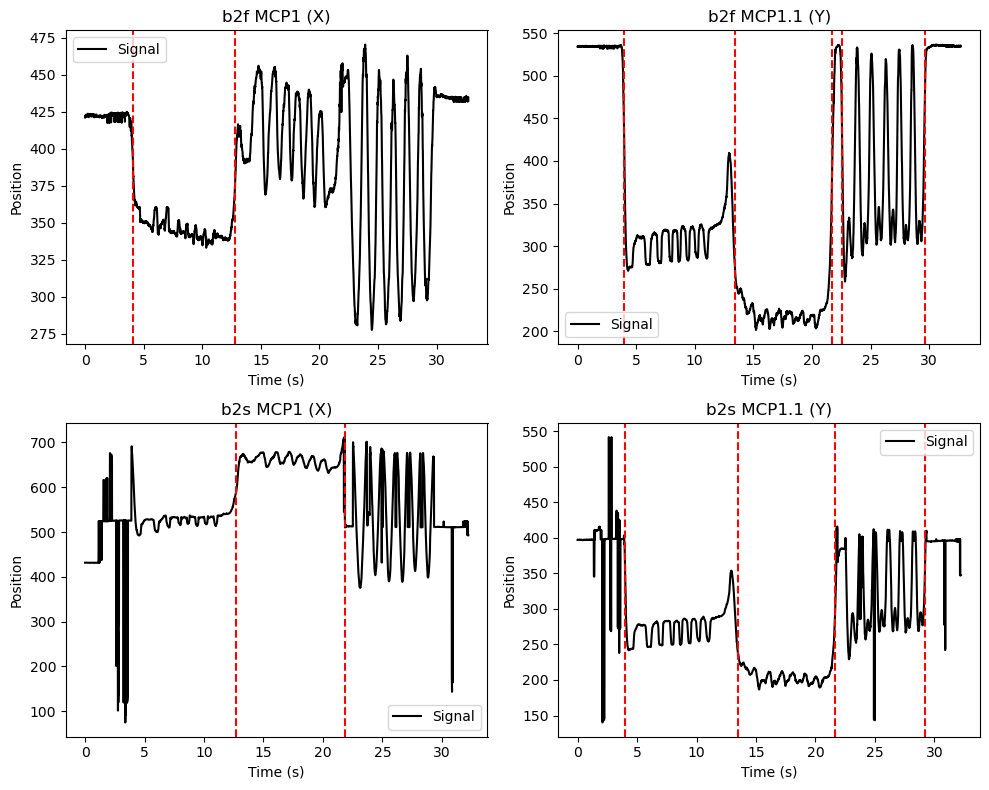

In [185]:
# Pulling data from the dataframe
b2f = dataframes['b2f']
b2s = dataframes['b2s']
xf = b2f['fTip2']
yf = b2f['fTip2.1']
xs = b2s['fTip2']
ys = b2s['fTip2.1']

views = [xf, yf, xs, ys]
titles = ['b2f MCP1 (X)', 'b2f MCP1.1 (Y)', 'b2s MCP1 (X)', 'b2s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()


c1f MCP1 (X) — Change points: [245, 265, 720, 785, 2230, 3715, 4550, 4635, 4936]
c1f MCP1.1 (Y) — Change points: [690, 1480, 2280, 3465, 4595, 4635, 4936]
c1s MCP1 (X) — Change points: [3013]
c1s MCP1.1 (Y) — Change points: [500, 1300, 1975, 2720, 3013]


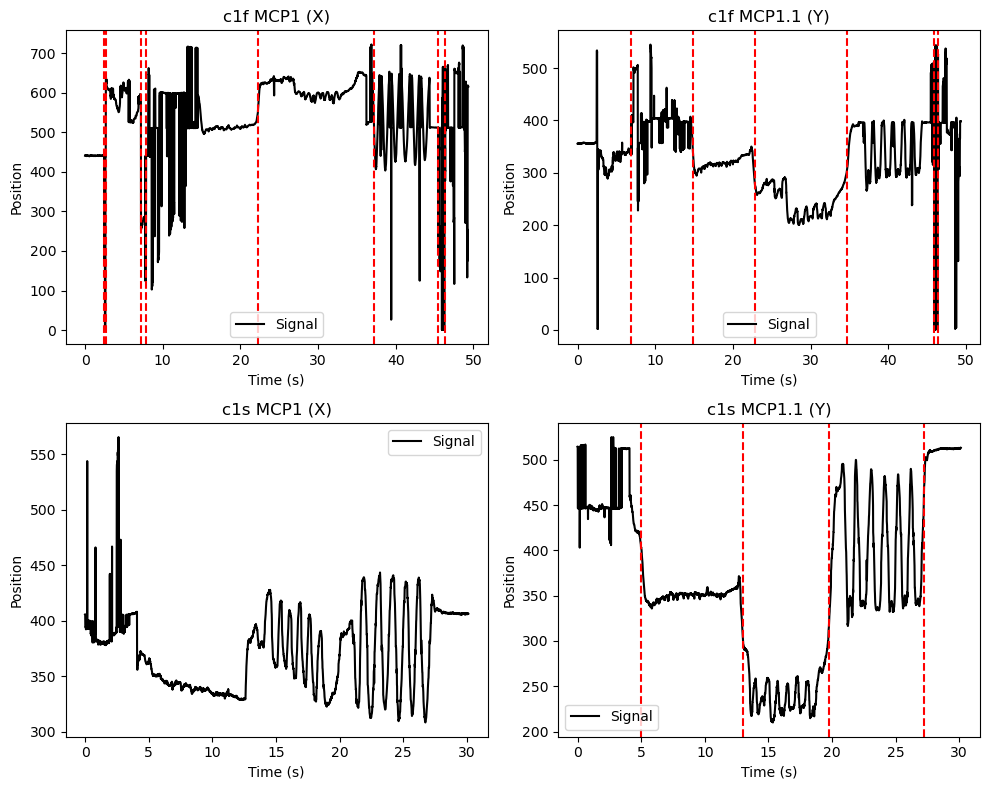

In [119]:
# Pulling data from the dataframe
c1f = dataframes['c1f']
c1s = dataframes['c1s']
xf = c1f['MCP1']
yf = c1f['MCP1.1']
xs = c1s['MCP1']
ys = c1s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['c1f MCP1 (X)', 'c1f MCP1.1 (Y)', 'c1s MCP1 (X)', 'c1s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()

t2f MCP1 (X) — Change points: [498]
t2f MCP1.1 (Y) — Change points: [498]
t2s MCP1 (X) — Change points: [340, 415, 435, 465, 522]
t2s MCP1.1 (Y) — Change points: [340, 465, 522]


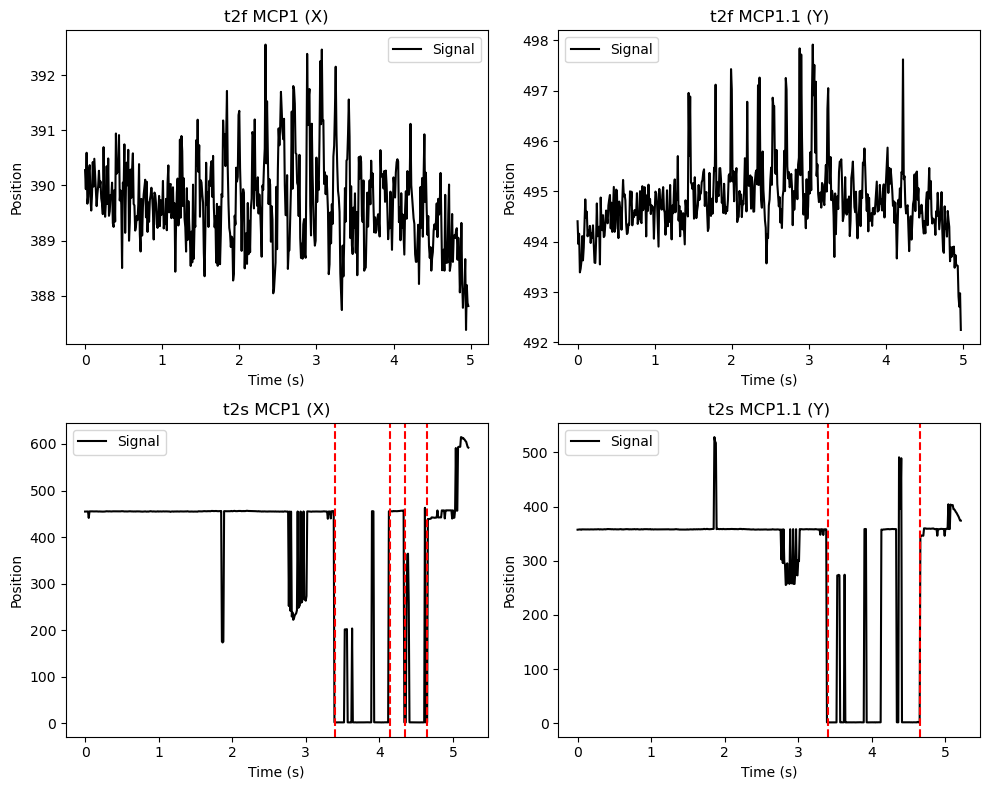

In [176]:
# Pulling data from the dataframe
c1f = dataframes['t2f']
c1s = dataframes['t2s']
xf = c1f['MCP1']
yf = c1f['MCP1.1']
xs = c1s['MCP1']
ys = c1s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['t2f MCP1 (X)', 't2f MCP1.1 (Y)', 't2s MCP1 (X)', 't2s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()

t1f MCP2 (X) — Change points: [619]
t1f MCP2.1 (Y) — Change points: [619]
t1s MCP2 (X) — Change points: [622]
t1s MCP2.1 (Y) — Change points: [622]


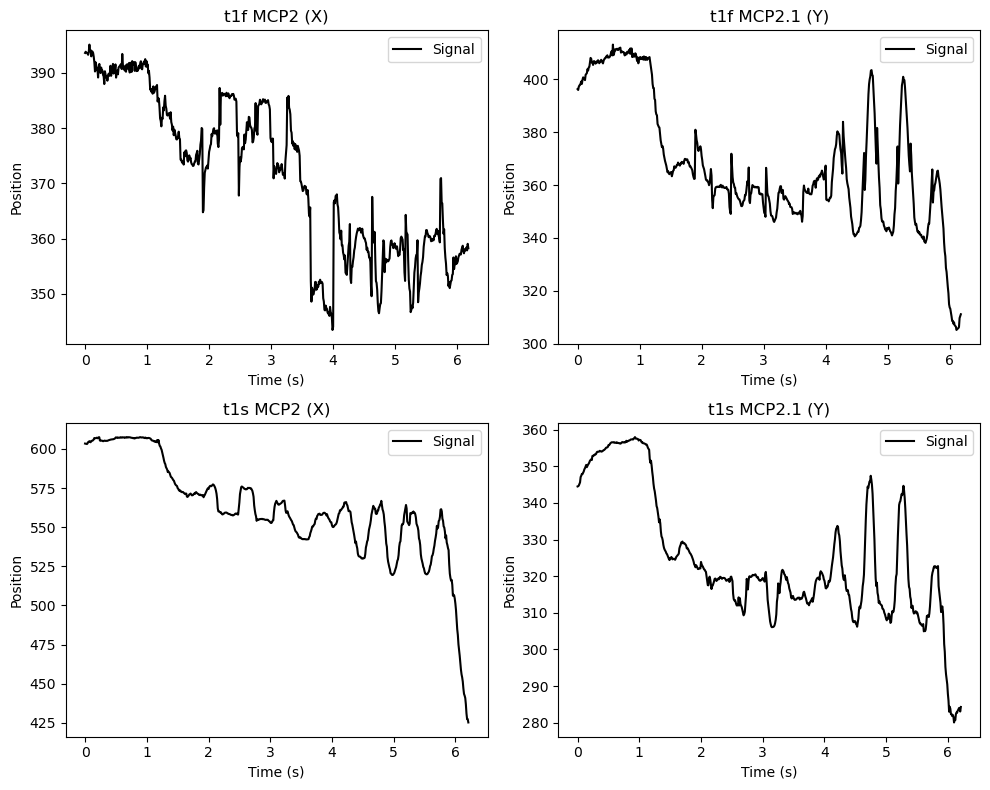

In [182]:
# Pulling data from the dataframe
c1f = dataframes['t1f']
c1s = dataframes['t1s']
xf = c1f['MCP2']
yf = c1f['MCP2.1']
xs = c1s['MCP2']
ys = c1s['MCP2.1']

views = [xf, yf, xs, ys]
titles = ['t1f MCP2 (X)', 't1f MCP2.1 (Y)', 't1s MCP2 (X)', 't1s MCP2.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()

t1f fTip2 (X) — Change points: [619]
t1f fTip2.1 (Y) — Change points: [619]
t1s fTip2 (X) — Change points: [622]
t1s fTip2.1 (Y) — Change points: [622]


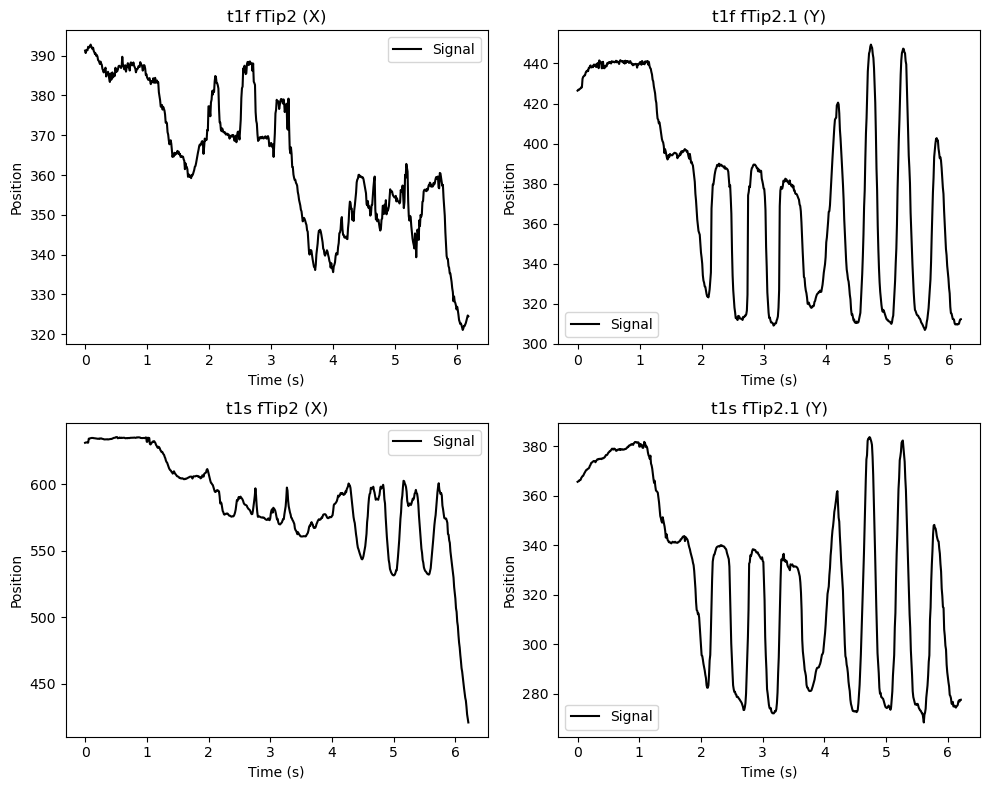

In [191]:
# Pulling data from the dataframe
c1f = dataframes['t1f']
c1s = dataframes['t1s']
xf = c1f['fTip2']
yf = c1f['fTip2.1']
xs = c1s['fTip2']
ys = c1s['fTip2.1']

views = [xf, yf, xs, ys]
titles = ['t1f fTip2 (X)', 't1f fTip2.1 (Y)', 't1s fTip2 (X)', 't1s fTip2.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [194]:
import pandas as pd
import ruptures as rpt

# Initialize an empty dictionary to hold results by base label
results_dict = {}

for df_name, data in dataframes.items():
    # Extract base label (e.g. 'b1' from 'b1f' or 'b1s')
    base_label = df_name[:-1]  # remove last character
    view = 'front' if df_name.endswith('f') else 'side'

    points = data['MCP1.1']
    points_np = points.to_numpy()

    algo = rpt.Pelt(model='l2').fit(points_np)
    change_points = algo.predict(pen=1e6)

    # Initialize dict entry if not exists
    if base_label not in results_dict:
        results_dict[base_label] = {'front': None, 'side': None}

    # Save change points in proper column
    results_dict[base_label][view] = change_points

# Convert dictionary to DataFrame
df_indices = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
df_indices.rename(columns={'index': 'dataset'}, inplace=True)


In [195]:
df_indices['front_length'] = df_indices['front'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [196]:
df_indices

,dataset,front,side,front_length
0,b1,"[1745, 2515, 3210, 4010, 4258]","[725, 765, 1210, 1265, 2800, 3510, 4556]",5
1,b2,"[400, 1345, 2155, 2960, 3271]","[335, 1345, 2155, 2945, 2985, 3223]",5
2,b3,"[345, 1255, 2065, 2845, 3053]","[1200, 1960, 2750, 2790, 2947]",5
3,c1,"[690, 1480, 2280, 3465, 4595, 4635, 4936]","[500, 1300, 1975, 2720, 3013]",7
4,c2,None,"[495, 1375, 2160, 3219]",0
5,c3,"[565, 1365, 2325, 3105, 3368]","[570, 1365, 2370, 3268]",5
6,t1,[619],[622],1
7,t2,[498],"[340, 465, 522]",1
8,t3,"[305, 1320, 2175, 2400, 3110, 3575]","[1315, 2195, 2280, 3075, 3200, 3300, 3531]",6


In [197]:
success_list = []

for _, row in df_indices.iterrows():
    # Check if number of change points in 'front' view is 4, 5, or 6
    num_cp = len(row['front']) if isinstance(row['front'], list) else 0

    if num_cp in [4, 5, 6]:
        success_list.append(f"{row['dataset']}f")
    else:
        success_list.append(f"{row['dataset']}s")

print(success_list)


['b1f', 'b2f', 'b3f', 'c1s', 'c2s', 'c3f', 't1s', 't2s', 't3f']


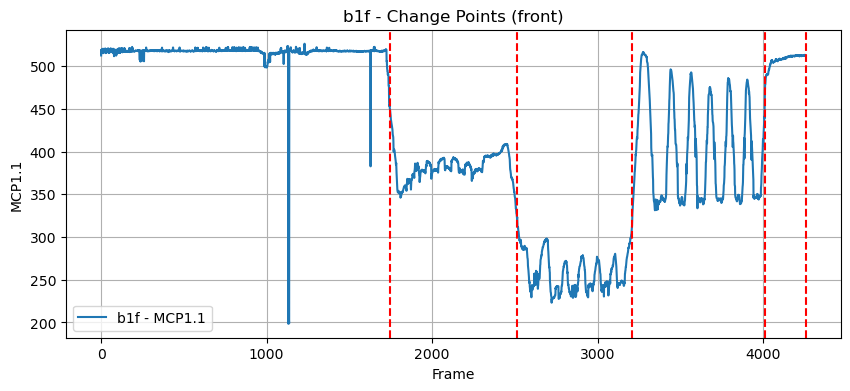

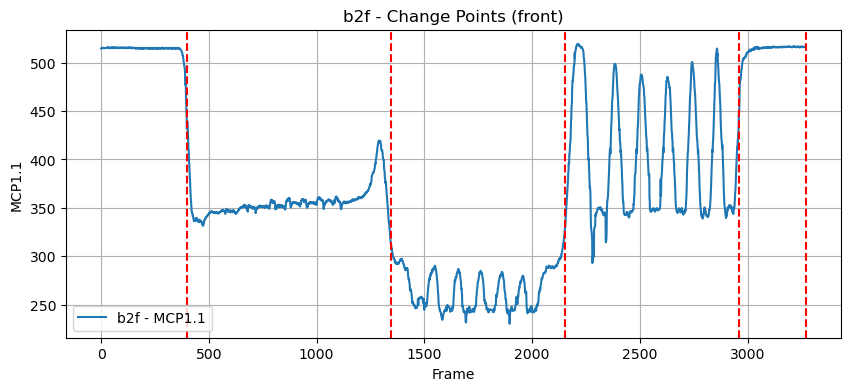

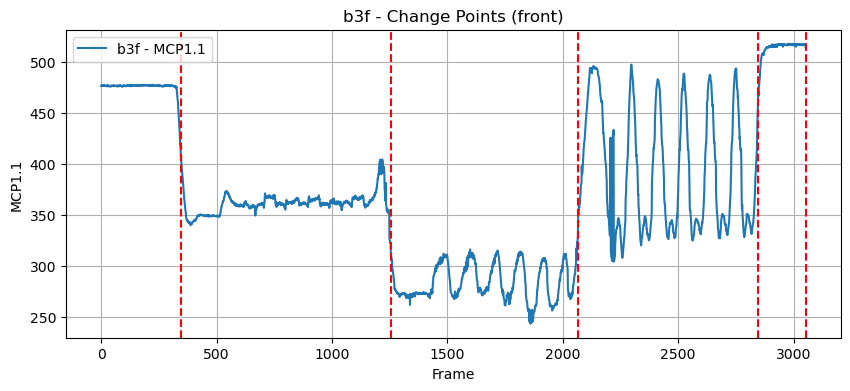

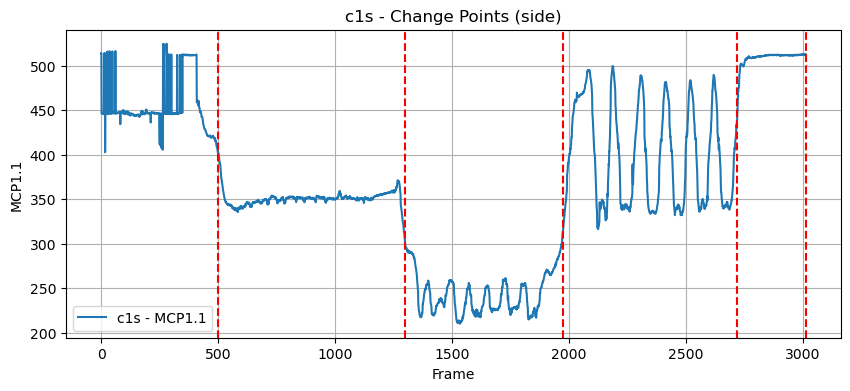

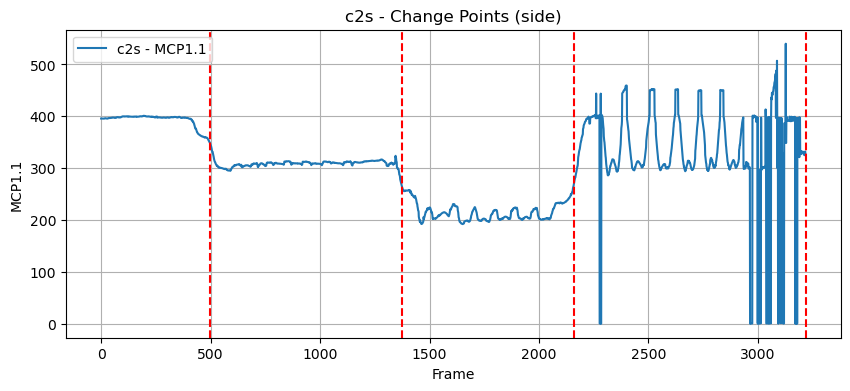

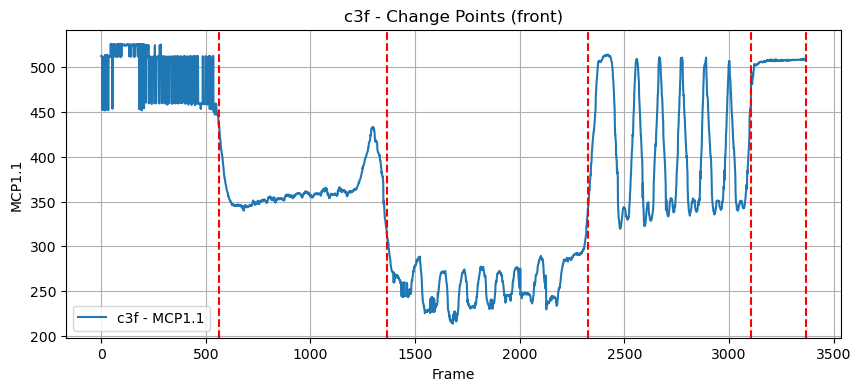

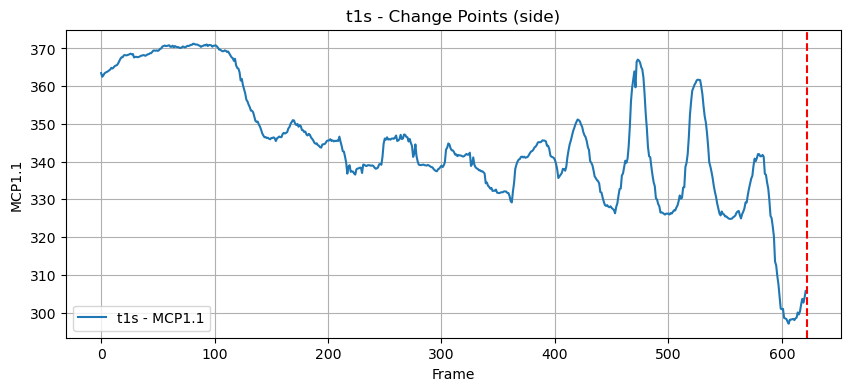

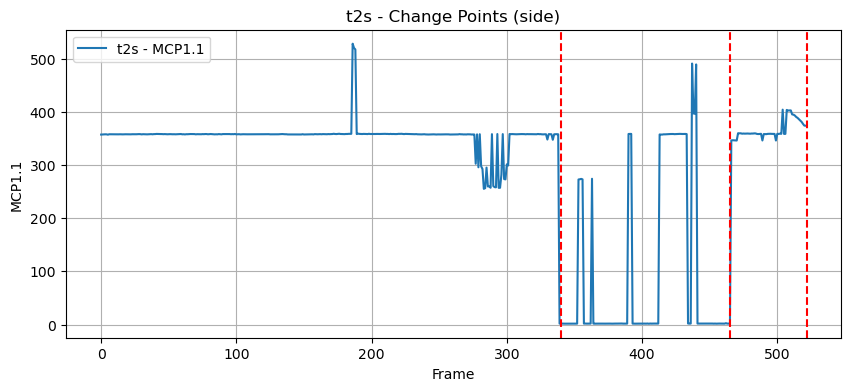

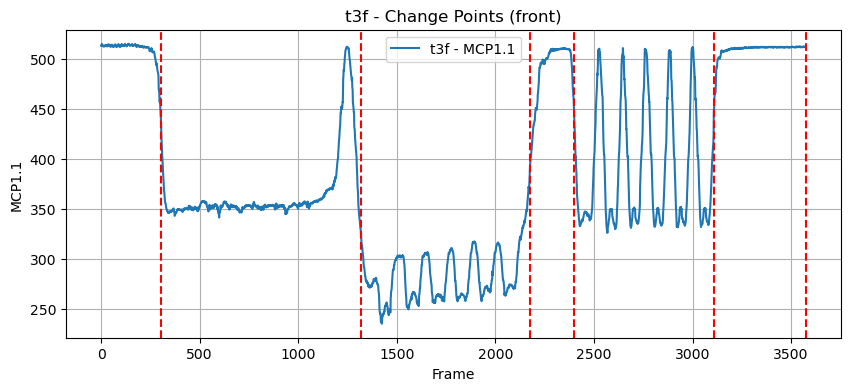

In [198]:
for name in success_list:
    base_name = name[:-1]  # e.g., 'b1' from 'b1f'
    view = 'front' if name.endswith('f') else 'side'

    # 1. Pull the signal from the correct DataFrame
    df = dataframes[name]
    signal = df['MCP1.1'].to_numpy()
    time = np.arange(len(signal))

    # 2. Get the change points for this dataset and view
    row = df_indices[df_indices['dataset'] == base_name]
    if not row.empty:
        change_points = row.iloc[0][view]
    else:
        change_points = []

    # 3. Plot the signal and overlay change points
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, label=f'{name} - MCP1.1')
    
    # Plot vertical lines at change points
    for cp in change_points:
        plt.axvline(cp, color='red', linestyle='--')

    plt.title(f"{name} - Change Points ({view})")
    plt.xlabel("Frame")
    plt.ylabel("MCP1.1")
    plt.grid(True)
    plt.legend()
    plt.show()


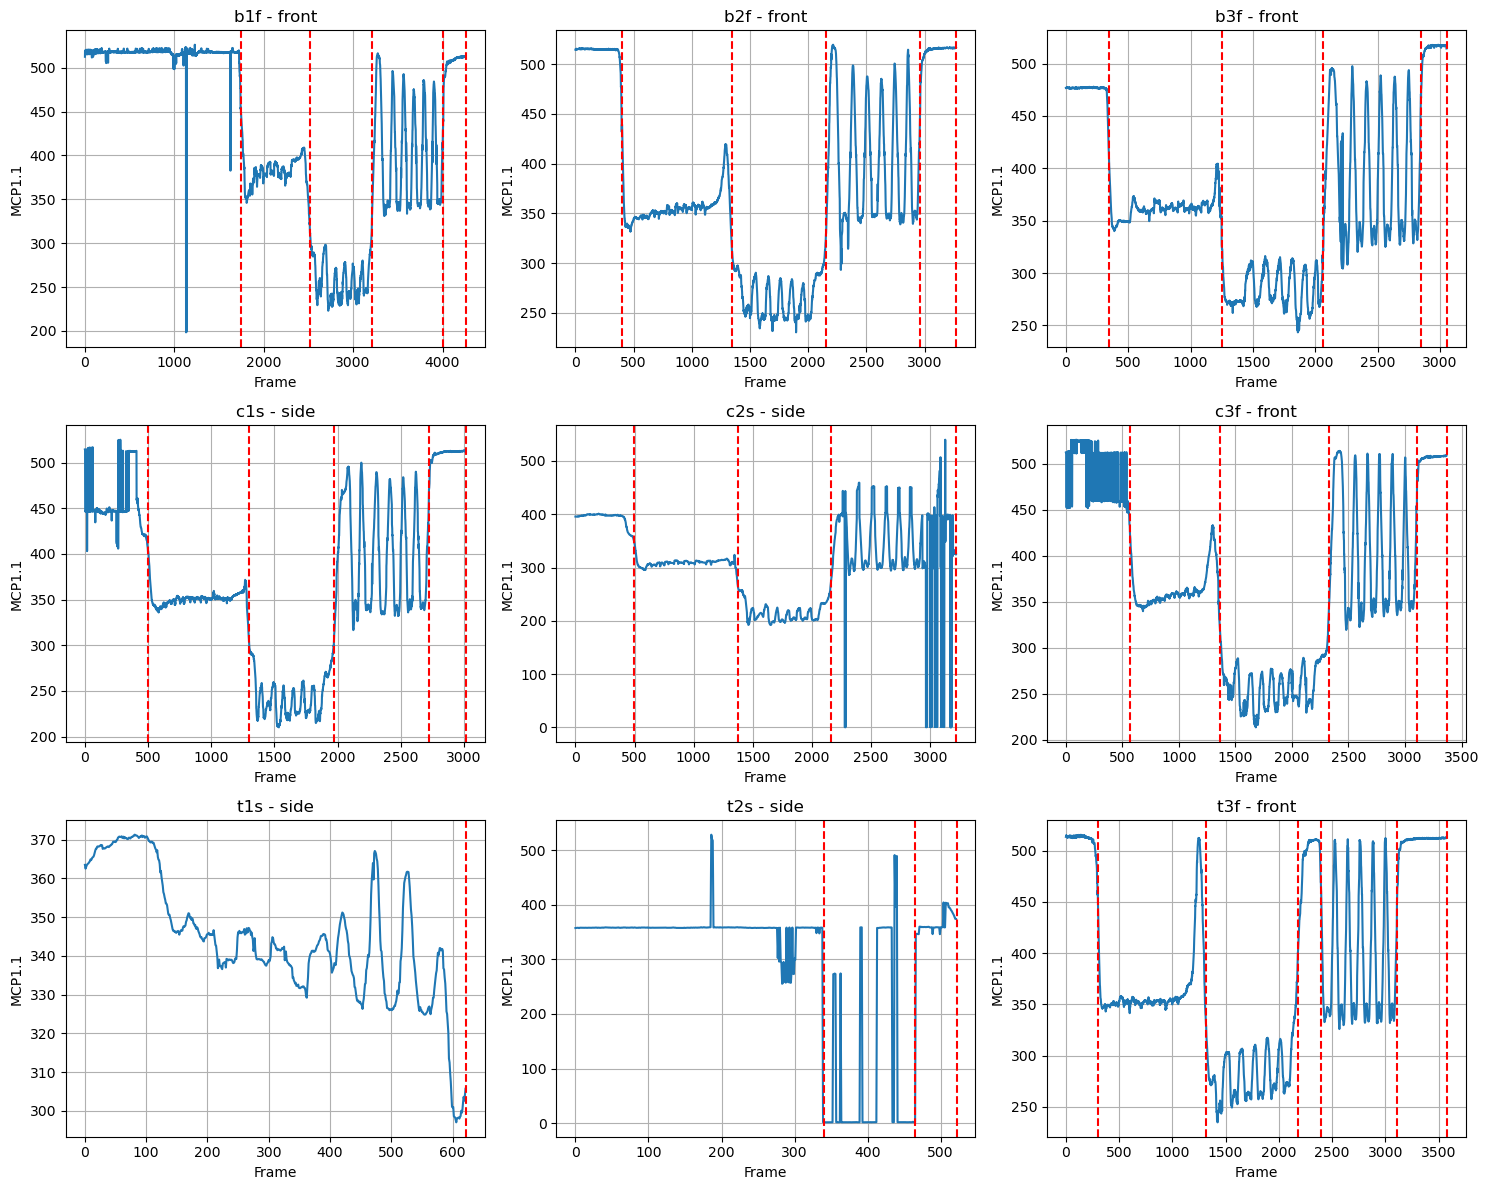

In [199]:
import matplotlib.pyplot as plt

# Define number of plots per row
plots_per_row = 3
num_plots = len(success_list)
num_rows = int(np.ceil(num_plots / plots_per_row))

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Make it 1D so it's easier to index

for i, name in enumerate(success_list):
    base_name = name[:-1]
    view = 'front' if name.endswith('f') else 'side'

    # Get signal
    df = dataframes[name]
    signal = df['MCP1.1'].to_numpy()
    time = np.arange(len(signal))

    # Get change points
    row = df_indices[df_indices['dataset'] == base_name]
    change_points = row.iloc[0][view] if not row.empty else []

    # Plot in subplot
    ax = axes[i]
    ax.plot(time, signal, label='MCP1.1')
    for cp in change_points:
        ax.axvline(cp, color='red', linestyle='--')

    ax.set_title(f"{name} - {view}")
    ax.set_xlabel("Frame")
    ax.set_ylabel("MCP1.1")
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


In [212]:
# Create empty DataFrame to hold results
columns = ['dataset', 'view', 'movement', 'data', 'time', 'indices']
df_movements = pd.DataFrame(columns=columns)

for name in success_list:
    base_name = name[:-1]               # 'b1' from 'b1f'
    view = 'front' if name.endswith('f') else 'side'
    
    # 1. Get signal and time
    df = dataframes[name]
    x = df['MCP1.1'].to_numpy()
    t = df.index.to_numpy() if 'time' not in df else df['time'].to_numpy()

    # 2. Get change points
    row = df_indices[df_indices['dataset'] == base_name]
    if row.empty:
        continue  # skip if no match

    change_points = row.iloc[0][view]
    if len(change_points) < 3:
        continue  # not enough points to split into 3 parts

    # 3. Define movement segments
    segment_info = {
        'hand_OC': (change_points[0], change_points[1]),
        'hand_PS': (change_points[1], change_points[2]),
        'arm_EF': (change_points[2], len(x))  # to end
    }

    for movement, (start, end) in segment_info.items():
        if end - start < 400:
            continue  # skip short segments

        segment_data = x[start:end]
        segment_time = t[start:end]

        df_movements = pd.concat([
            df_movements,
            pd.DataFrame([{
                'dataset': base_name,
                'view': view,
                'movement': movement,
                'data': segment_data,
                'time': segment_time,
                'indices': (start, end)
            }])
        ], ignore_index=True)

# Optional: preview result
print(df_movements.head())


  dataset   view movement                                               data  \
0      b1  front  hand_OC  [450.00656, 448.0502, 445.30121, 443.25018, 44...   
1      b1  front  hand_PS  [317.83844, 312.74094, 311.93942, 311.05396, 3...   
2      b1  front   arm_EF  [327.45755, 330.77271, 334.17511, 337.41238, 3...   
3      b2  front  hand_OC  [439.14294, 439.14536, 432.31442, 423.14078, 4...   
4      b2  front  hand_PS  [311.82791, 312.01193, 310.13269, 306.78973, 3...   

                                                time       indices  
0  [1746, 1747, 1748, 1749, 1750, 1751, 1752, 175...  (1745, 2515)  
1  [2516, 2517, 2518, 2519, 2520, 2521, 2522, 252...  (2515, 3210)  
2  [3211, 3212, 3213, 3214, 3215, 3216, 3217, 321...  (3210, 4258)  
3  [401, 402, 403, 404, 405, 406, 407, 408, 409, ...   (400, 1345)  
4  [1346, 1347, 1348, 1349, 1350, 1351, 1352, 135...  (1345, 2155)  


In [213]:
df_movements.head()
df_movements.tail()

,dataset,view,movement,data,time,indices
16,c3,front,hand_PS,"[314.3186, 312.25275, 310.72263, 308.97678, 30...","[1366, 1367, 1368, 1369, 1370, 1371, 1372, 137...","(1365, 2325)"
17,c3,front,arm_EF,"[336.15594, 341.42813, 343.06091, 345.35739, 3...","[2326, 2327, 2328, 2329, 2330, 2331, 2332, 233...","(2325, 3368)"
18,t3,front,hand_OC,"[428.27444, 420.95416, 416.69455, 409.87665, 4...","[306, 307, 308, 309, 310, 311, 312, 313, 314, ...","(305, 1320)"
19,t3,front,hand_PS,"[318.30408, 315.83234, 314.0921, 313.83417, 31...","[1321, 1322, 1323, 1324, 1325, 1326, 1327, 132...","(1320, 2175)"
20,t3,front,arm_EF,"[389.47913, 394.36267, 396.09561, 399.92871, 4...","[2176, 2177, 2178, 2179, 2180, 2181, 2182, 218...","(2175, 3575)"


In [232]:
def hand_PS_mov(t_hand_PS, hand_PS):
    '''reports the peaks and the troughs'''
    t_np = np.asarray(t_hand_PS)
    y_np = np.asarray(hand_PS)
    
    peaks, _ = find_peaks(y_np, distance=100)
    troughs, _ = find_peaks(-y_np, distance=100)

    t_peak = t_hand_PS[peaks]
    t_trough = t_hand_PS[troughs]

    return t_peak, t_trough

In [233]:
def arm_EF_mov(t_arm_EF, arm_EF):
    '''reports the peaks and troughs'''
    t_np = np.asarray(t_arm_EF)
    y_np = np.asarray(arm_EF)
    
    peaks, _ = find_peaks(y_np, distance=100)
    troughs, _ = find_peaks(-y_np, distance=100)

    t_peak = t_arm_EF[peaks]
    t_trough = t_arm_EF[troughs]

    return t_peak, t_trough

In [229]:
def hand_OC_mov(t, y):
    '''reports the peaks and truoghs fromt eh euc distance'''

    return 0, 0
    

In [234]:
def compute_peaks_troughs(row):
    if row['movement'] == 'hand_OC':
        return pd.Series(hand_OC_mov(row['time'], row['data']))
    elif row['movement'] == 'hand_PS':
        return pd.Series(hand_PS_mov(row['time'], row['data']))
    elif row['movement'] == 'arm_EF':
        return pd.Series(arm_EF_mov(row['time'], row['data']))
    else:
        return pd.Series([None, None])  # default fallback

# Apply and create new columns
df_movements[['peaks', 'troughs']] = df_movements.apply(compute_peaks_troughs, axis=1)


In [235]:
df_movements

,dataset,view,movement,data,time,indices,peaks,troughs
0,b1,front,hand_OC,"[450.00656, 448.0502, 445.30121, 443.25018, 44...","[1746, 1747, 1748, 1749, 1750, 1751, 1752, 175...","(1745, 2515)",0,0
1,b1,front,hand_PS,"[317.83844, 312.74094, 311.93942, 311.05396, 3...","[2516, 2517, 2518, 2519, 2520, 2521, 2522, 252...","(2515, 3210)","[2520, 2693, 2809, 2912, 3099, 3199]","[2601, 2723, 2852, 3039, 3159]"
2,b1,front,arm_EF,"[327.45755, 330.77271, 334.17511, 337.41238, 3...","[3211, 3212, 3213, 3214, 3215, 3216, 3217, 321...","(3210, 4258)","[3276, 3442, 3566, 3680, 3789, 3905, 4045, 414...","[3232, 3347, 3499, 3604, 3749, 3862, 3974, 408..."
3,b2,front,hand_OC,"[439.14294, 439.14536, 432.31442, 423.14078, 4...","[401, 402, 403, 404, 405, 406, 407, 408, 409, ...","(400, 1345)",0,0
4,b2,front,hand_PS,"[311.82791, 312.01193, 310.13269, 306.78973, 3...","[1346, 1347, 1348, 1349, 1350, 1351, 1352, 135...","(1345, 2155)","[1347, 1447, 1551, 1659, 1762, 1863, 2046, 2146]","[1360, 1460, 1585, 1695, 1795, 1897, 2007, 2108]"
5,b2,front,arm_EF,"[335.06079, 339.45883, 342.71967, 346.3273, 34...","[2156, 2157, 2158, 2159, 2160, 2161, 2162, 216...","(2155, 3271)","[2215, 2385, 2507, 2630, 2743, 2859, 3022, 312...","[2173, 2282, 2451, 2572, 2676, 2792, 2901, 300..."
6,b3,front,hand_OC,"[409.40518, 406.11288, 402.24872, 400.51428, 3...","[346, 347, 348, 349, 350, 351, 352, 353, 354, ...","(345, 1255)",0,0
7,b3,front,hand_PS,"[312.09073, 310.85718, 309.12454, 307.09369, 3...","[1256, 1257, 1258, 1259, 1260, 1261, 1262, 126...","(1255, 2065)","[1261, 1364, 1485, 1599, 1718, 1820, 1923, 2063]","[1339, 1530, 1649, 1751, 1861, 1962, 2064]"
8,b3,front,arm_EF,"[328.60373, 343.32758, 352.04663, 350.80725, 3...","[2066, 2067, 2068, 2069, 2070, 2071, 2072, 207...","(2065, 3053)","[2135, 2298, 2412, 2525, 2638, 2751, 2885, 2986]","[2069, 2222, 2340, 2459, 2563, 2681, 2787, 288..."
9,c1,side,hand_OC,"[403.45663, 402.40698, 400.61636, 400.27429, 3...","[501, 502, 503, 504, 505, 506, 507, 508, 509, ...","(500, 1300)",0,0


## b1f MCP1 x

Detected change points: [245, 265, 720, 785, 2230, 3715, 4550, 4635, 4936]


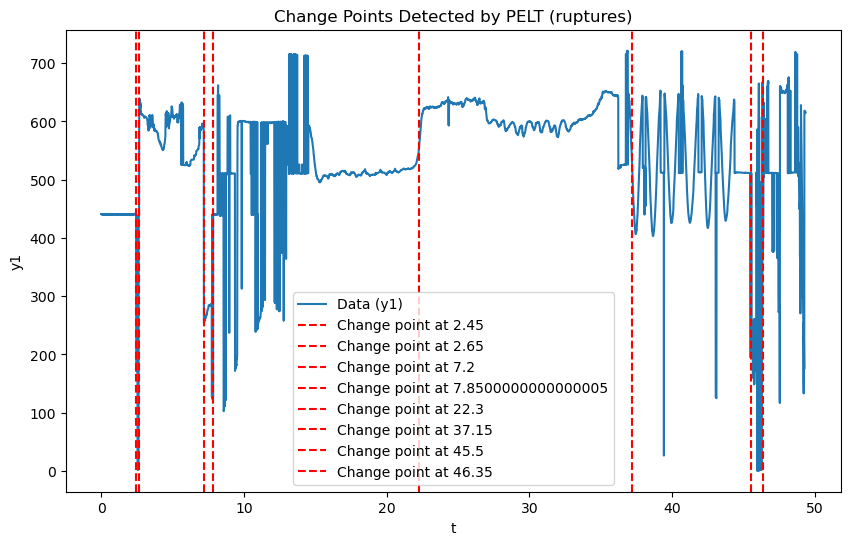

In [117]:
# pulling data from the dataframe
c1f = dataframes['c1f']
x = c1f['MCP1']

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
x_np = x.to_numpy() if hasattr(x, 'to_numpy') else x

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(x_np)
result = algo.predict(pen=1000000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

## b1f MCP1 y

Detected change points: [1745, 2515, 3210, 4010, 4258]


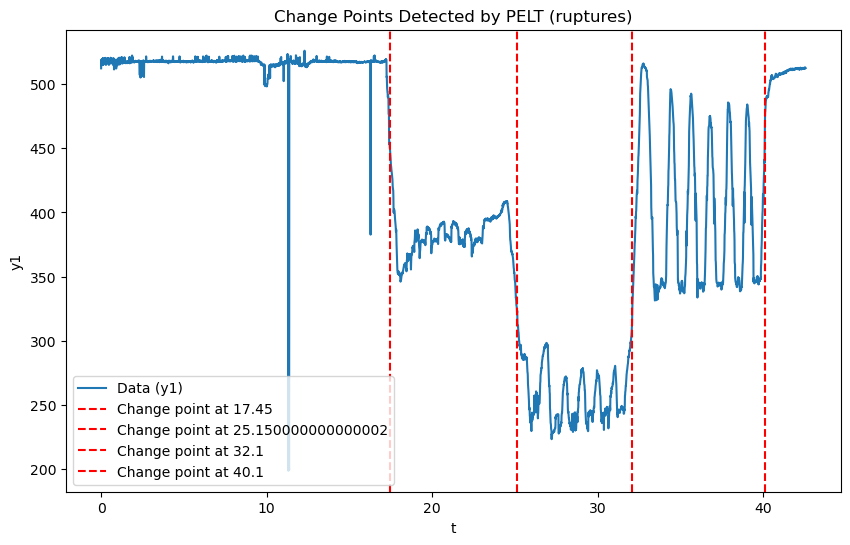

In [215]:
# pulling data from the dataframe
b1f = dataframes['b1f']
x = b1f['MCP1.1']

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
x_np = x.to_numpy() if hasattr(x, 'to_numpy') else x

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(x_np)
result = algo.predict(pen=1000000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

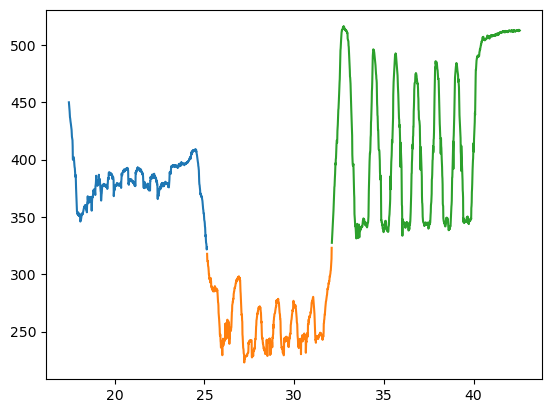

In [216]:
hand_OC = x[result[0]:result[1]]
hand_PS = x[result[1]:result[2]]
arm_EF = x[result[2]:]

t_hand_OC = t[result[0]:result[1]]
t_hand_PS = t[result[1]:result[2]]
t_arm_EF = t[result[2]:]

plt.plot(t_hand_OC, hand_OC)
plt.show
plt.plot(t_hand_PS, hand_PS)
plt.show
plt.plot(t_arm_EF, arm_EF)

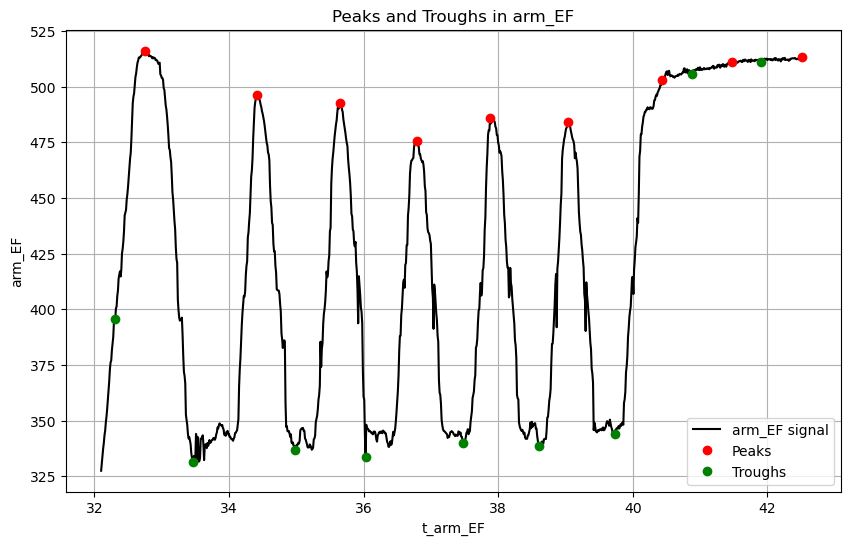

[3275. 3441. 3565. 3679. 3788. 3904. 4044. 4147. 4252.]
[3231. 3346. 3498. 3603. 3748. 3861. 3973. 4088. 4190.]


In [136]:
t_np = np.asarray(t_arm_EF)
y_np = np.asarray(arm_EF)

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')
plt.title('Peaks and Troughs in arm_EF')
plt.xlabel('t_arm_EF')
plt.ylabel('arm_EF')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


[32.77 34.45 35.67 36.83 37.96 39.07] [34.42 35.65 36.76 37.92 39.02 40.19]


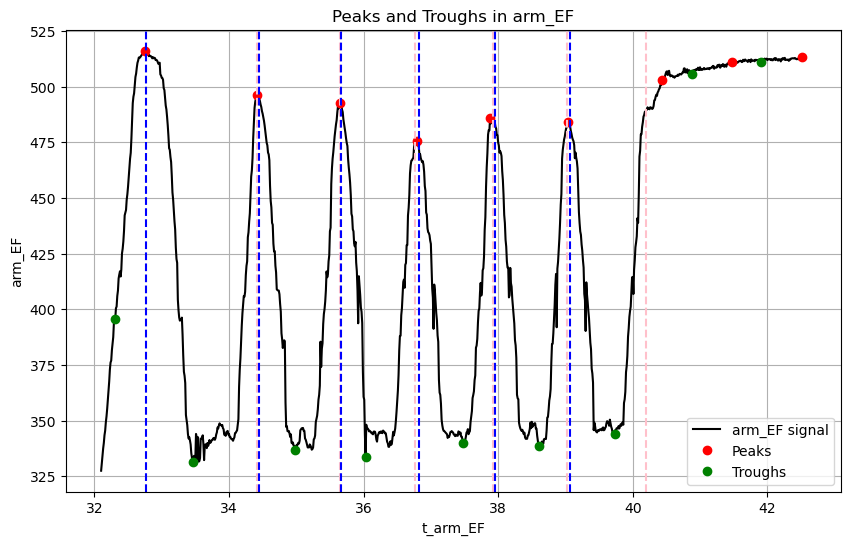

[3275. 3441. 3565. 3679. 3788. 3904. 4044. 4147. 4252.]
[3231. 3346. 3498. 3603. 3748. 3861. 3973. 4088. 4190.]


In [137]:
t_np = np.asarray(t_arm_EF)
y_np = np.asarray(arm_EF)

manual_peak_points = [3277,3445,3567,3683,3796,3907]
manual_trough_points = [3442,3565,3676,3792,3902,4019]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')
plt.title('Peaks and Troughs in arm_EF')
plt.xlabel('t_arm_EF')
plt.ylabel('arm_EF')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)



[25.72 26.95 28.12 29.14 30.07 31.06] [26.77 28.03 29.08 30.01 30.88 31.93]


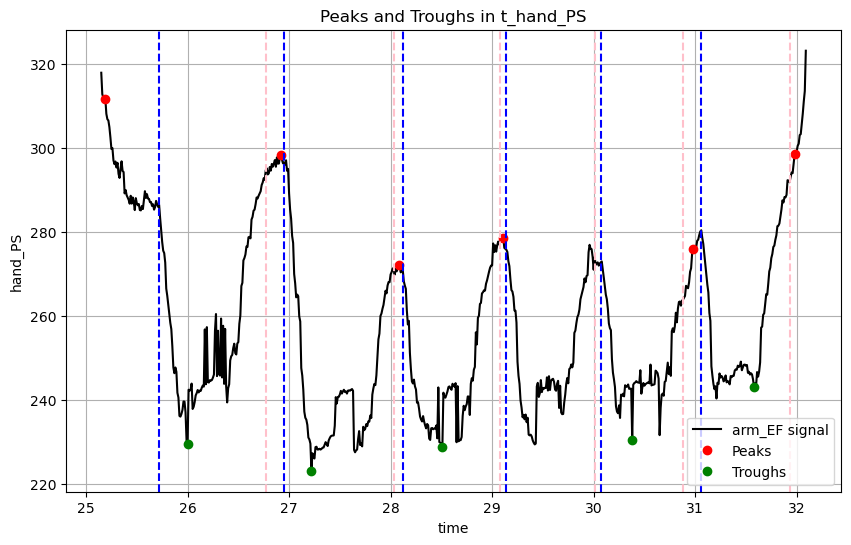

[3214. 3387. 3503. 3606. 3793. 3893.]
[3295. 3417. 3546. 3733. 3853.]


In [138]:
t_np = np.asarray(t_hand_PS)
y_np = np.asarray(hand_PS)

manual_peak_points = [2572,2695,2812,2914,3007,3106]
manual_trough_points = [2677,2803,2908,3001,3088,3193]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.title('Peaks and Troughs in t_hand_PS')
plt.xlabel('time')
plt.ylabel('hand_PS')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


[18.38 18.89 19.5  20.28 21.03 21.87] [18.86 19.32 20.1  20.91 21.72 22.56]


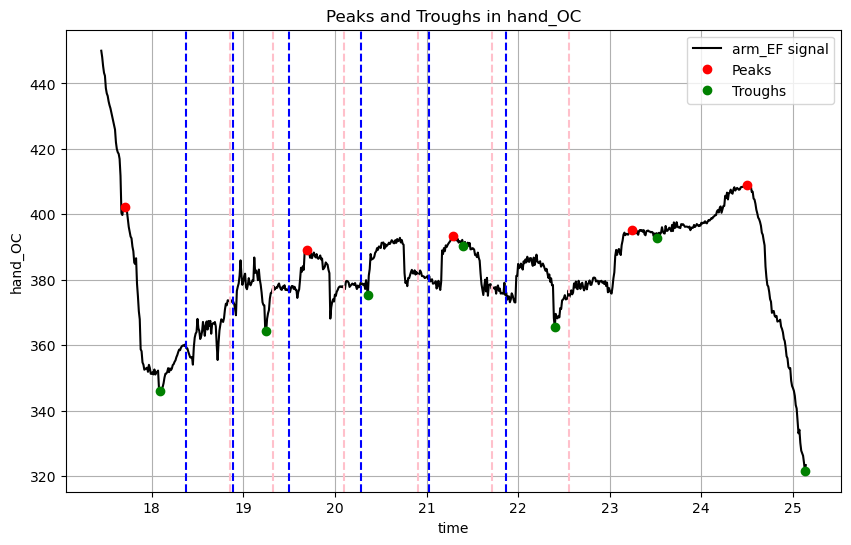

[3236. 3435. 3594. 3789. 3915.]
[3274. 3390. 3501. 3605. 3705. 3817. 3978.]


In [139]:
t_np = np.asarray(t_hand_OC)
y_np = np.asarray(hand_OC)

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.title('Peaks and Troughs in hand_OC')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


770
770


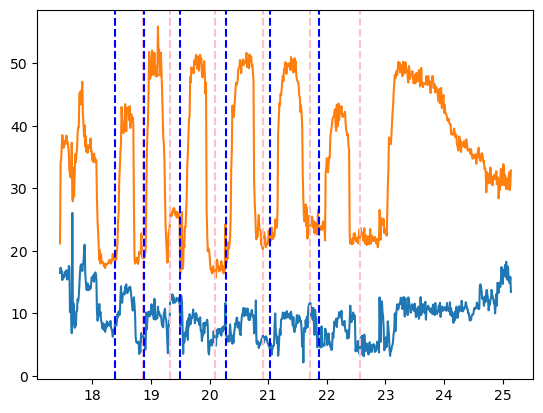

In [ ]:
b1f = dataframes['b1f']
MCP1x = b1f['MCP1']
MCP1y = b1f['MCP1.1']
MCP2x = b1f['MCP2']
MCP2y = b1f['MCP2.1']



# Element-wise subtraction: col1 - col2
euc_dis_x = np.abs(MCP1x-MCP2x)
euc_dis_y = np.abs(MCP1y-MCP2y)

ed_x = euc_dis_x[result[0]:result[1]]
ed_y = euc_dis_y[result[0]:result[1]]

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]



print(len(ed_x))
print(len(t_hand_OC))


plt.plot(t_hand_OC, ed_x, label = 'euc distance x')
plt.plot(t_hand_OC, ed_y, label = 'euc distance y')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

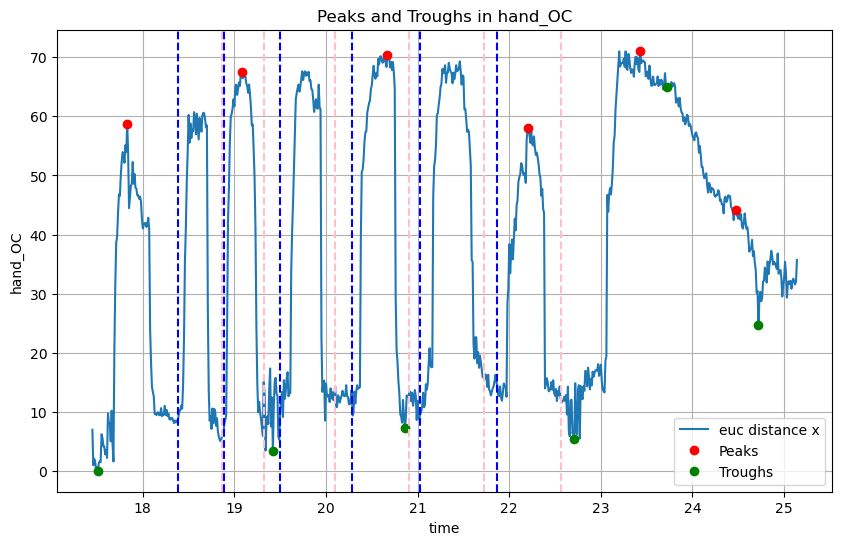

In [240]:
manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(ed_y, distance=100)
troughs, _ = find_peaks(-ed_y, distance=100)


# Convert both to NumPy arrays to ensure positional indexing works
t = np.array(t_hand_OC)
y = np.array(ed_y)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='euc distance x')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')

for i in range(6):
    plt.axvline(scaled_peaks[i], linestyle='--', color='blue')
    plt.axvline(scaled_troughs[i], linestyle='--', color='pink')

plt.title('Peaks and Troughs in hand_OC')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()


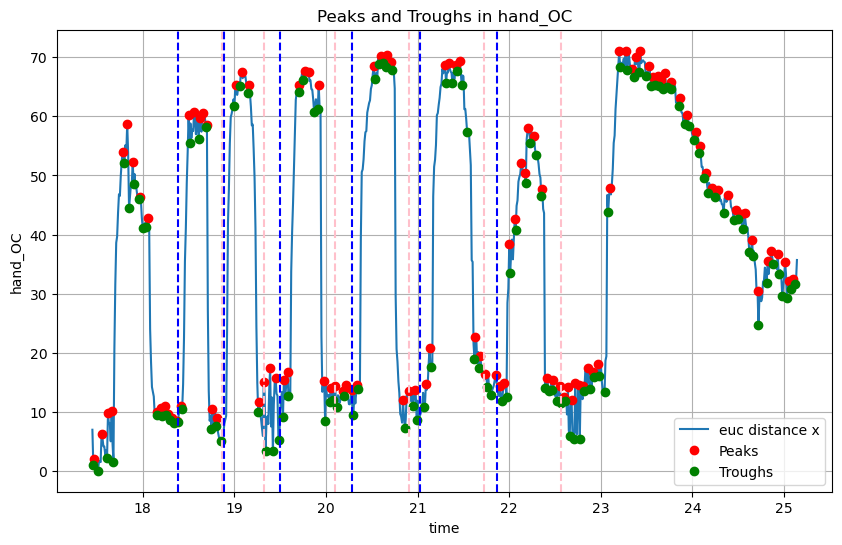

In [250]:
manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(ed_y, distance=4, width=0.5, rel_height=0.75,prominence=0.3,wlen=15)
troughs, _ = find_peaks(-ed_y, distance=4, width=0.5, rel_height=0.75,prominence=0.3,wlen=15)


# Convert both to NumPy arrays to ensure positional indexing works
t = np.array(t_hand_OC)
y = np.array(ed_y)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='euc distance x')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')

for i in range(6):
    plt.axvline(scaled_peaks[i], linestyle='--', color='blue')
    plt.axvline(scaled_troughs[i], linestyle='--', color='pink')

plt.title('Peaks and Troughs in hand_OC')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()



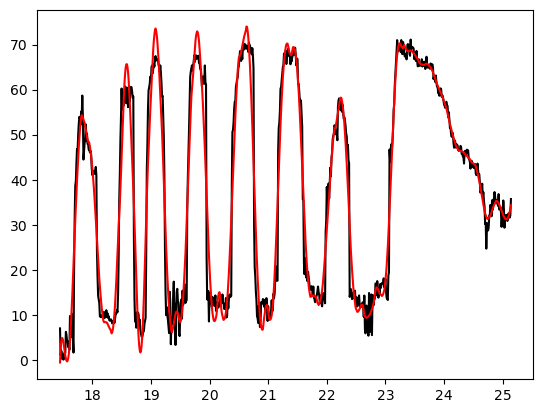

In [241]:
from scipy.signal import savgol_filter
# Savitzky-Golay Filter – Preserves shape, ideal for noisy data

# y must be a 1D NumPy array
window_length = 51  # must be odd and >= polyorder
polyorder = 5
y_smooth = savgol_filter(y, window_length=window_length, polyorder=polyorder)


plt.plot(t, y, label='normal data', color = 'black')
plt.plot(t, y_smooth, label='smoothed', color = 'red')

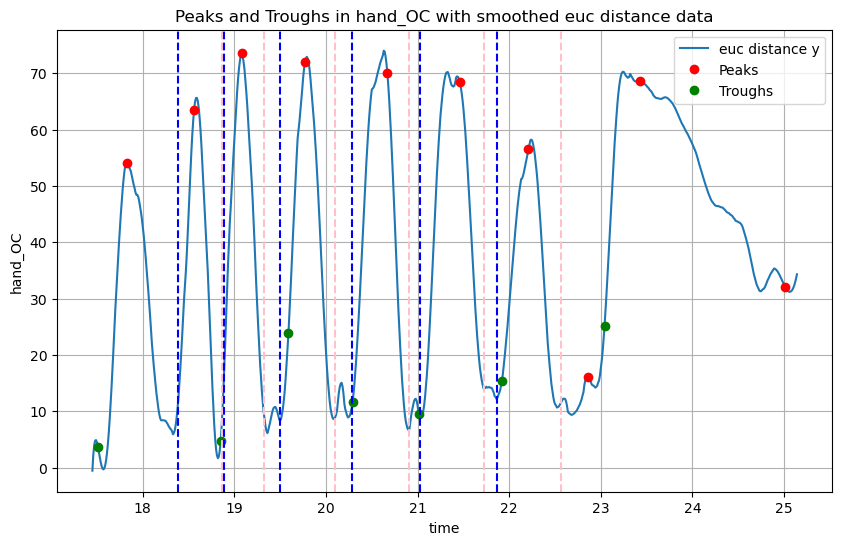

In [275]:
peaks, _ = find_peaks(ed_y, distance=50, width=0.1, rel_height=0.75,prominence=2,wlen=15)
troughs, _ = find_peaks(-ed_y, distance=15, width=0.1, rel_height=0.01, prominence=2, wlen=15)

# Convert both to NumPy arrays to ensure positional indexing works
t = np.array(t_hand_OC)
y = np.array(y_smooth)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='euc distance y')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')

for i in range(6):
    plt.axvline(scaled_peaks[i], linestyle='--', color='blue')
    plt.axvline(scaled_troughs[i], linestyle='--', color='pink')

plt.title('Peaks and Troughs in hand_OC with smoothed euc distance data')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()


In [247]:
def plot_derivative(data, time, title='Derivative of Signal'):

    # Compute numerical derivative using numpy gradient
    derivative = np.gradient(data, time)

    # Plot the derivative
    plt.figure(figsize=(10, 4))
    plt.plot(time, derivative, label='Derivative', color='blue')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('First Derivative of signal')
    plt.grid(True)
    plt.legend()
    plt.show()

    return derivative


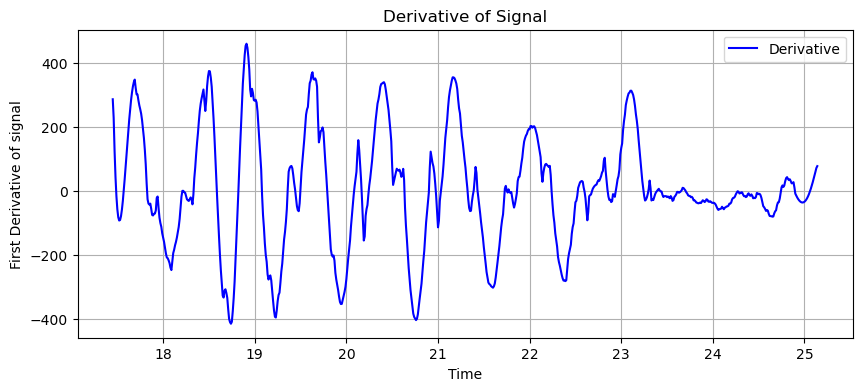

array([ 2.86888724e+02,  2.28512626e+02,  1.24170064e+02,  4.33725675e+01,
       -1.63730305e+01, -5.74494115e+01, -8.21287743e+01, -9.25728336e+01,
       -9.08328210e+01, -7.88494843e+01, -5.84530879e+01, -3.13634124e+01,
        8.10244987e-01,  3.65690705e+01,  7.45247342e+01,  1.13399389e+02,
        1.52025673e+02,  1.89346706e+02,  2.24416093e+02,  2.56397920e+02,
        2.84566760e+02,  3.08307667e+02,  3.27116180e+02,  3.40598319e+02,
        3.48470592e+02,  3.23145186e+02,  3.02603347e+02,  3.01848992e+02,
        2.83598545e+02,  2.67771494e+02,  2.55534723e+02,  2.41732627e+02,
        2.21154997e+02,  1.93041195e+02,  1.65778750e+02,  1.29140201e+02,
        8.33147803e+01,  2.29378561e+01, -2.61636217e+01, -3.95239401e+01,
       -4.26248152e+01, -3.96973108e+01, -5.61958002e+01, -7.51141110e+01,
       -7.67196308e+01, -7.13500266e+01, -7.06658635e+01, -6.10260066e+01,
       -2.18024510e+01, -1.73281061e+01, -5.31424884e+01, -8.36259282e+01,
       -1.00567444e+02, -

In [249]:
plot_derivative(y_smooth, t_hand_OC)

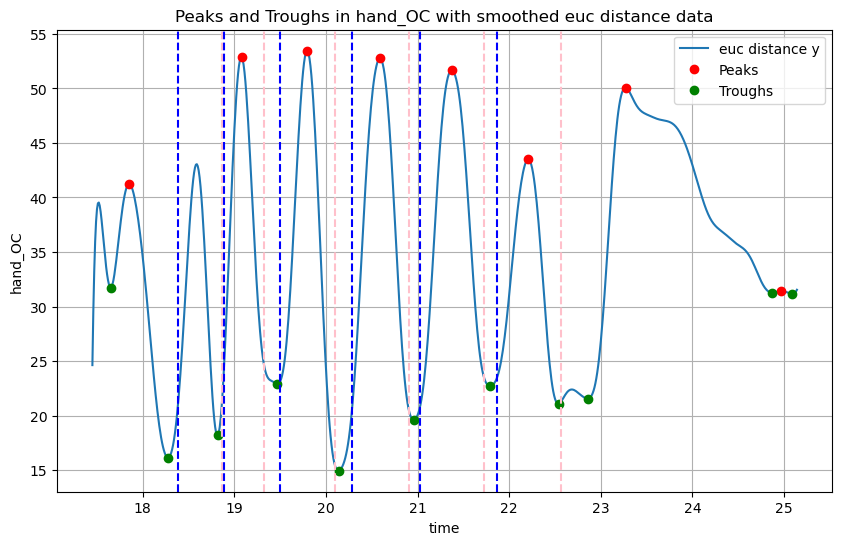

In [237]:
peaks, _ = find_peaks(y_smooth, distance=50)
troughs, _ = find_peaks(-y_smooth, distance=15)

# Convert both to NumPy arrays to ensure positional indexing works
t = np.array(t_hand_OC)
y = np.array(y_smooth)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='euc distance y')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')

for i in range(6):
    plt.axvline(scaled_peaks[i], linestyle='--', color='blue')
    plt.axvline(scaled_troughs[i], linestyle='--', color='pink')

plt.title('Peaks and Troughs in hand_OC with smoothed euc distance data')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()




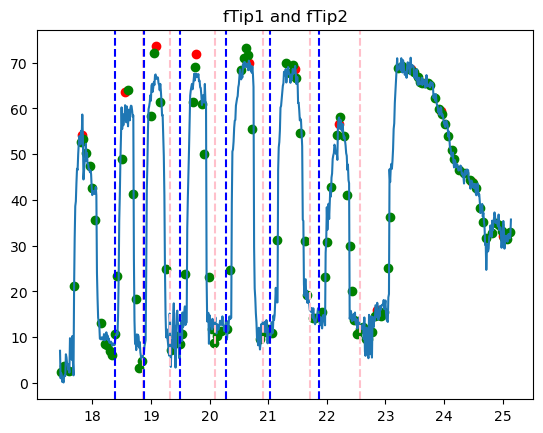

In [254]:
b1f = dataframes['b1f']
ft1x = b1f['fTip1']
ft1y = b1f['fTip1.1']
ft2x = b1f['fTip2']
ft2y = b1f['fTip2.1']

# Element-wise subtraction: col1 - col2
euc_dis_x = np.abs(ft1x-ft2x)
euc_dis_y = np.abs(ft1y-ft2y)

ed_x = euc_dis_x[result[0]:result[1]]
ed_y = euc_dis_y[result[0]:result[1]]

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

peaks, _ = find_peaks(ed_y, distance=50, width=0.5, rel_height=0.75,prominence=0.3,wlen=15)
troughs, _ = find_peaks(-ed_y, distance=4, width=0.5, rel_height=0.75,prominence=0.3,wlen=15)

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')
plt.plot(t_hand_OC, ed_y, label = 'euc distance y')
plt.title('fTip1 and fTip2')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

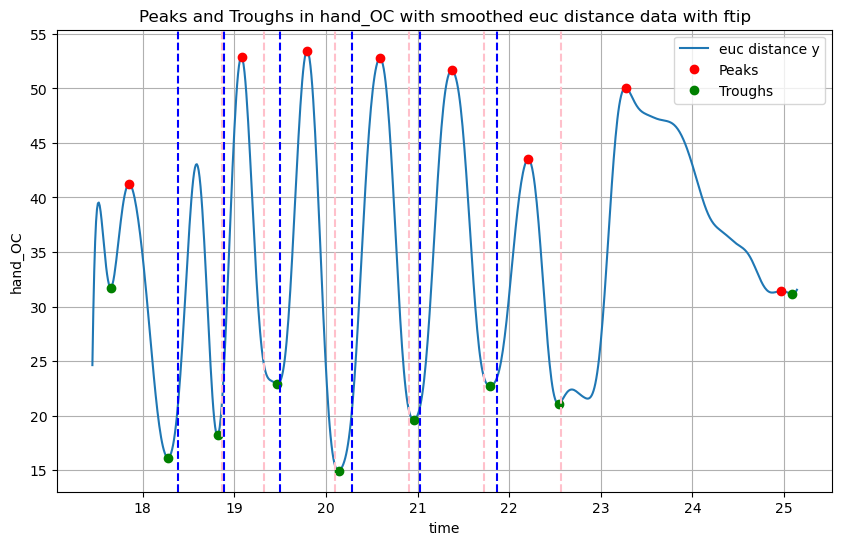

In [220]:
window_length = 51  # must be odd and >= polyorder
polyorder = 5
y_smooth = savgol_filter(y, window_length=window_length, polyorder=polyorder)

peaks, _ = find_peaks(y_smooth, distance=50)
troughs, _ = find_peaks(-y_smooth, distance=50)

# Convert both to NumPy arrays to ensure positional indexing works
t = np.array(t_hand_OC)
y = np.array(y_smooth)

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='euc distance y')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.plot(t[troughs], y[troughs], 'go', label='Troughs')

for i in range(6):
    plt.axvline(scaled_peaks[i], linestyle='--', color='blue')
    plt.axvline(scaled_troughs[i], linestyle='--', color='pink')

plt.title('Peaks and Troughs in hand_OC with smoothed euc distance data with ftip')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()